Importing libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
import string
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn
from yellowbrick.classifier import ROCAUC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score


In [4]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bwan9\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bwan9\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bwan9\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
#df1 = pd.read_csv("php data.csv")
#df2 = pd.read_csv("java data.csv")
#df3 = pd.read_csv('stackoverflow data.csv')
# This method combines a list of pandas dataframes into one dataframe
#pd.concat([df1, df2, df3]).to_csv('All_data.csv', index=False)

In [ ]:
# import and read data file
df = pd.read_csv('All_data.csv')
df

# Explarotary Data Analysis (EDA)

In [4]:
# Find info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35900 entries, 0 to 35899
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      35900 non-null  int64 
 1   Title   35900 non-null  object
 2   Body    35900 non-null  object
 3   Tags    35900 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.1+ MB


In [5]:
# Find the number of col and rows of dataset
df.shape

(35900, 4)

In [5]:
# id is not needed
df = df[['Title','Body','Tags']]
df

,Title,Body,Tags
0,No display after getting all Id's using checkbox,<p>Hello guys can you please help me to solve ...,<php>
1,How to check if 30 minutes left for a business...,<p>I am currently working on a project where i...,<php>
2,how to fix this error : Fatal error: Call to u...,<p>I will like to hash the password entered by...,<php>
3,PHP - trying to loop through a checkbox array,<p>I don't get why this code isnt working. I c...,<php>
4,Shorten a string to allowed length,<p>I'm writing a functionality that take a str...,<php>
...,...,...,...
35895,How to make Python 2.7 and Python 3.1 coexist ...,<p>I have a Python 3.1 installed on my desktop...,<python>
35896,ConcurrentModificationException exception with...,<p>I'm creating a multithread chat server in j...,<java>
35897,"Same syntax as : if, for, while",<p>I thought of a syntax that could be very he...,<javascript>
35898,"python, repeat random.randint?",<p>I am new to python and i would like to know...,<python>


In [7]:
# Find number of NULL values (eventually if have need remove in preprocessing)
df.isnull().sum()

Title    0
Body     0
Tags     0
dtype: int64

In [8]:
# Find is there any duplicates data (eventually if have need remove in preprocessing)
df.duplicated().any()

df = df.drop_duplicates()
df.shape

(34231, 3)

<Figure size 72000x72000 with 0 Axes>

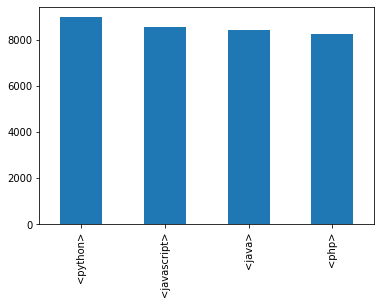

<Figure size 72000x72000 with 0 Axes>

In [9]:
# Plot a graph to view the number of each values for the Tags 
# (purpose to check if there is any unbalanced data)
uniq_value = df['Tags'].value_counts()
uniq_value.plot(kind='bar');
plt.xticks(rotation=90)
plt.figure(figsize=(1000, 1000))

In [10]:
# class count

#class_count_0, class_count_1,class_count_2,class_count_3 = df['Tags'].value_counts()

# Separate class
class_0 = df[df['Tags'] == '<javascript>']
class_1 = df[df['Tags'] == '<python>']# print the shape of the class
class_2 = df[df['Tags'] == "<java>"]# print the shape of the class
class_3 = df[df['Tags'] == "<php>"]# print the shape of the class

print('class JS:', class_0.shape)
print('class python:', class_1.shape)
print('class java:', class_2.shape)
print('class php:', class_3.shape)

class JS: (8574, 3)
class python: (8974, 3)
class java: (8437, 3)
class php: (8246, 3)


# Data Cleaning & Preprocessing

In [12]:
# Creating a function to convert the text in lowercase, remove the extra space, special chr., ulr and links.
stop_words = stopwords.words()

def wordopt(text):
    text = text.lower()
    text = re.sub('<.*?>+', '', text)
    text = re.sub('\[.*?\]', '', str(text))
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)  
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) 
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)   
    text = re.sub(" \d+", '', text)  
  
    # removing the stop-words          
    text_tokens = word_tokenize(text)
    tokens_without_sw = [word for word in text_tokens if not word in stop_words]
    filtered_sentence = (" ").join(tokens_without_sw)
    text = filtered_sentence
    
    return text

In [13]:
# cleaned the text after applying the wordopt func
df["Body"]  = df["Body"].apply(wordopt)
df_temp = df
df_temp

C:\Users\bwan9\OneDrive\Desktop\Python_Learning\Jupyter_enviroments\venv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Title,Body,Tags
0,No display after getting all Id's using checkbox,hello guys please help solve happen suddenly l...,<php>
1,How to check if 30 minutes left for a business...,currently working project business open displa...,<php>
2,how to fix this error : Fatal error: Call to u...,like hash password entered user get errorerror...,<php>
3,PHP - trying to loop through a checkbox array,get code isnt working display results page che...,<php>
4,Shorten a string to allowed length,writing functionality string converts url slug...,<php>
...,...,...,...
35895,How to make Python 2.7 and Python 3.1 coexist ...,python installed desktop need python run cql i...,<python>
35896,ConcurrentModificationException exception with...,creating multithread chat server java user log...,<java>
35897,"Same syntax as : if, for, while",thought syntax could helpful function myfuncti...,<javascript>
35898,"python, repeat random.randint?",new python would like know make code repeat ra...,<python>


In [14]:
# Writing to the file after preprocessing 
df_temp.to_csv('cleaned_Stackoverflow_data.csv', index=False)


In [15]:
#x_train = x_train['Text']
#x_test = x_test['Text']
#print(x_train.shape)
#print(x_test.shape)

(27384,)
(6847,)


# Read with New cleaned Data file for training

In [3]:
df2 = pd.read_csv('cleaned_Stackoverflow_data.csv')
df2

,Title,Body,Tags
0,No display after getting all Id's using checkbox,hello guys please help solve happen suddenly l...,<php>
1,How to check if 30 minutes left for a business...,currently working project business open displa...,<php>
2,how to fix this error : Fatal error: Call to u...,like hash password entered user get errorerror...,<php>
3,PHP - trying to loop through a checkbox array,get code isnt working display results page che...,<php>
4,Shorten a string to allowed length,writing functionality string converts url slug...,<php>
...,...,...,...
34226,How to make Python 2.7 and Python 3.1 coexist ...,python installed desktop need python run cql i...,<python>
34227,ConcurrentModificationException exception with...,creating multithread chat server java user log...,<java>
34228,"Same syntax as : if, for, while",thought syntax could helpful function myfuncti...,<javascript>
34229,"python, repeat random.randint?",new python would like know make code repeat ra...,<python>


# TFIDF & Train_Test_Split

In [4]:


X = df2['Body']
y = df2['Tags']

train_x, test_x, train_y, test_y = train_test_split(X,y, test_size=0.20,random_state=42,shuffle=True)
train_x.shape

vectorizer = TfidfVectorizer(max_df=0.75)
vec_train = vectorizer.fit_transform(train_x)

vec_test = vectorizer.transform(test_x)
vec_y = vectorizer.transform(test_y)


# Compare model (training the model to choose best algorithm, means we train with a few algorihm 

In [5]:


# first, initialize the classificators
clf_tree= DecisionTreeClassifier(random_state=24) # using the random state for reproducibility
clf_log = LogisticRegression(max_iter=10000)
clf_gnb = MultinomialNB()

# now, create a list with the objects 
models= [clf_tree, clf_log, clf_gnb]

for model in models:
    model.fit(vec_train, train_y) # fit the model
    y_pred= model.predict(vec_test) # then predict on the test set
    accuracy= accuracy_score(test_y, y_pred) # this gives us how often the algorithm predicted correctly
    clf_report= classification_report(test_y, y_pred) # with the report, we have a bigger picture, with precision and recall for each class
    print(f"The accuracy of model {type(model).__name__} is {accuracy * 100}")
    print(clf_report)
    print("\n")

The accuracy of model DecisionTreeClassifier is 87.3667299547247
              precision    recall  f1-score   support

      <java>       0.89      0.87      0.88      1739
<javascript>       0.86      0.85      0.86      1721
       <php>       0.86      0.87      0.86      1614
    <python>       0.88      0.90      0.89      1773

    accuracy                           0.87      6847
   macro avg       0.87      0.87      0.87      6847
weighted avg       0.87      0.87      0.87      6847



The accuracy of model LogisticRegression is 92.27398860814957
              precision    recall  f1-score   support

      <java>       0.95      0.91      0.93      1739
<javascript>       0.91      0.92      0.91      1721
       <php>       0.91      0.92      0.91      1614
    <python>       0.91      0.94      0.93      1773

    accuracy                           0.92      6847
   macro avg       0.92      0.92      0.92      6847
weighted avg       0.92      0.92      0.92      6847




In [6]:
# Print all accuracy
print('Accuracy of Logistic Regression:', clf_log.score(vec_test, test_y)*100, "%")
print('Accuracy of Decision Tree:', clf_tree.score(vec_test, test_y)*100, "%")
print('Accuracy of Multinomial Naive Bayes:', clf_gnb.score(vec_test, test_y)*100, "%")

Accuracy of Logistic Regression: 92.27398860814957 %
Accuracy of Decision Tree: 87.3667299547247 %
Accuracy of Multinomial Naive Bayes: 88.65196436395502 %


# Model Evaluation

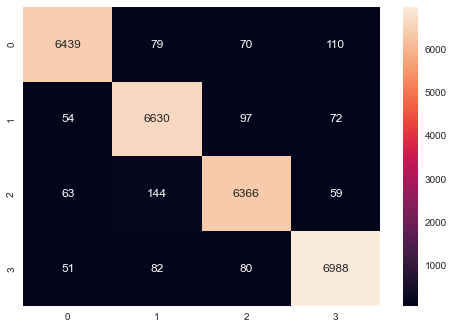

In [7]:

# Confusion Matrix


y_pred = clf_log.predict(vec_train)

cm = confusion_matrix(train_y, y_pred)
df = pd.DataFrame(cm)

sn.heatmap(df,annot=True, fmt='d')

test =  confusion_matrix(train_y, y_pred)

ROC_AUC curve

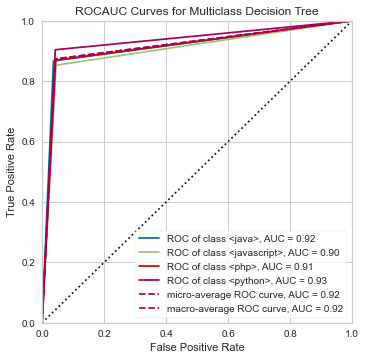

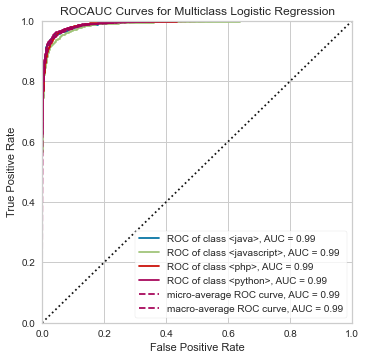

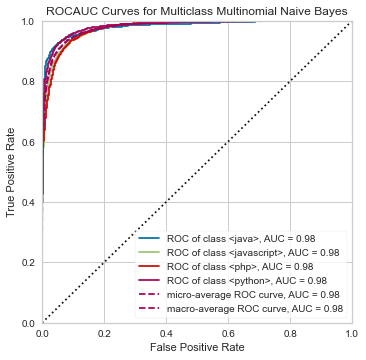

<AxesSubplot:title={'center':'ROCAUC Curves for Multiclass Multinomial Naive Bayes'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [8]:
# ROC-AUC curve
from yellowbrick.classifier import ROCAUC

# ROC curve for Logistic Reg
visualizer = ROCAUC(clf_tree, size=(400, 400), title = "ROCAUC Curves for Multiclass Decision Tree")
# Fitting to the training data first then scoring with the test data                                    
visualizer.fit(vec_train, train_y)
visualizer.score(vec_test, test_y)
visualizer.show()

# ROC curve for Logistic Reg
visualizer = ROCAUC(clf_log, size=(400, 400), title = "ROCAUC Curves for Multiclass Logistic Regression")
visualizer.fit(vec_train, train_y)
visualizer.score(vec_test, test_y)
visualizer.show()

visualizer = ROCAUC(clf_gnb, size=(400, 400), title = "ROCAUC Curves for Multiclass Multinomial Naive Bayes")
visualizer.fit(vec_train, train_y)
visualizer.score(vec_test, test_y)
visualizer.show()

C:\Users\bwan9\OneDrive\Desktop\Python_Learning\Jupyter_enviroments\venv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bwan9\OneDrive\Desktop\Python_Learning\Jupyter_enviroments\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bwan9\OneDrive\Desktop\Python_Learning\Jupyter_enviroments\venv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1374, in fit
    " class: %r" % classes_[0])
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: '<php>'

  FitFailedWarning)
C:\Users\bwan9\OneDrive\Desktop\Python_Learning\Jupyter_enviroments\venv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Esti

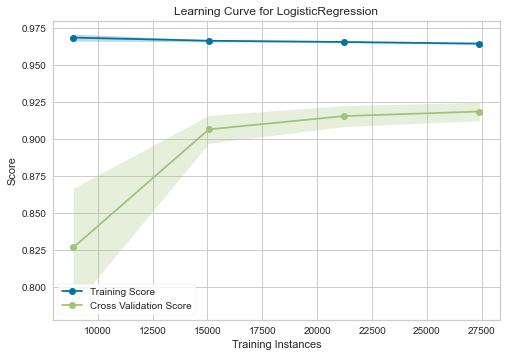

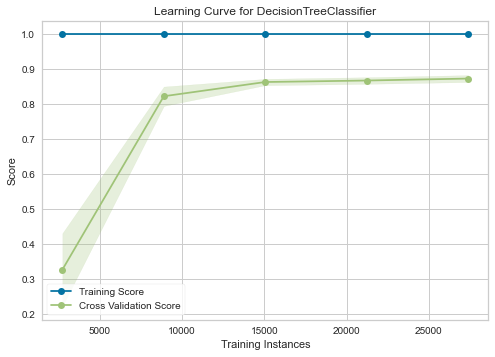

LearningCurve(ax=<AxesSubplot:title={'center':'Learning Curve for DecisionTreeClassifier'}, xlabel='Training Instances', ylabel='Score'>,
              cv=5, estimator=DecisionTreeClassifier(random_state=24),
              scoring='accuracy')

In [31]:
from yellowbrick.model_selection import learning_curve
vec_X = vectorizer.fit_transform(X)

learning_curve(clf_log, vec_X, y, cv=5, scoring='accuracy')
learning_curve(clf_tree, vec_X, y, cv=5, scoring='accuracy')

# Model explainer (Text Feature explanation)

In [7]:
import eli5
eli5.show_weights(clf_log, vec=vectorizer, top=20, target_names=['Java','Javascript','PHP','Python'])

/Users/admin/Desktop/Python/Jupyter envoriment/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# Test Model

In [12]:
test_set = ['using external javascript files in a .js file  i would like to use an external javascript file in another javascript file. for example  i could store all my global variables in a globals.js file and then call then from the website logic logic.js. then in the index.html  i would insert the  tag. how do i use the globals.js inside the logic.js']
new_test = vectorizer.transform(test_set)
print('The predicted result for Logistic Regression:',clf_log.predict(new_test))

The predicted result for Logistic Regression: ['<javascript>']


# TextExplainer 

In [9]:
test='''I am sending data request in this format to my laravel backend application array:2 [0 => array:2 [
"email" => "sam@gmail.com"
    "role_id" => 2
  ]
  1 => array:2 [
    "email" => "joy@gmail.com"
    "role_id" => 3
  ]
]
How do I validate the email and role_id in laravel'''
eli5.explain_prediction(clf_log, test, vec=vectorizer,target_names=['Java','Javascript','PHP','Python'])

Explanation(estimator='LogisticRegression(max_iter=10000)', description=None, error=None, method='linear model', is_regression=False, targets=[TargetExplanation(target='Java', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='application', weight=0.3006581332715877, std=None, value=0.1410310073080735), FeatureWeight(feature='format', weight=0.12449177506920117, std=None, value=0.12813440709825874), FeatureWeight(feature='sending', weight=0.10659168867479801, std=None, value=0.18770753686423533), FeatureWeight(feature='joy', weight=0.031819726438134036, std=None, value=0.2739186272880897)], neg=[FeatureWeight(feature='array', weight=-0.3770793307853163, std=None, value=0.28323735542008316), FeatureWeight(feature='email', weight=-0.37080199019224447, std=None, value=0.4493587319321344), FeatureWeight(feature='laravel', weight=-0.20073495581604509, std=None, value=0.48513186176223544), FeatureWeight(feature='gmail', weight=-0.1303250239783276, std=None, value=0.39919631152646234), FeatureWeight(feature='data', weight=-0.08078512384374789, std=None, value=0.0961459598595883), FeatureWeight(feature='<BIAS>', weight=-0.07944671384828646, std=None, value=1.0), FeatureWeight(feature='validate', weight=-0.07429625337991766, std=None, value=0.18645364459177446), FeatureWeight(feature='sam', weight=-0.032741867422381596, std=None, value=0.24744582364137355), FeatureWeight(feature='request', weight=-0.024695012695181148, std=None, value=0.14916503712255708), FeatureWeight(feature='backend', weight=-0.013965876693414696, std=None, value=0.22154086734904202)], pos_remaining=0, neg_remaining=0), proba=0.052919956052226866, score=-0.821310825201142, weighted_spans=WeightedSpans(docs_weighted_spans=[DocWeightedSpans(document='i am sending data request in this format to my laravel backend application array:2 [0 => array:2 [\n"email" => "sam@gmail.com"\n    "role_id" => 2\n  ]\n  1 => array:2 [\n    "email" => "joy@gmail.com"\n    "role_id" => 3\n  ]\n]\nhow do i validate the email and role_id in laravel', spans=[('sending', [(5, 12)], 0.10659168867479801), ('data', [(13, 17)], -0.08078512384374789), ('request', [(18, 25)], -0.024695012695181148), ('format', [(34, 40)], 0.12449177506920117), ('laravel', [(47, 54)], -0.20073495581604509), ('backend', [(55, 62)], -0.013965876693414696), ('application', [(63, 74)], 0.3006581332715877), ('array', [(75, 80)], -0.3770793307853163), ('array', [(89, 94)], -0.3770793307853163), ('email', [(100, 105)], -0.37080199019224447), ('sam', [(111, 114)], -0.032741867422381596), ('gmail', [(115, 120)], -0.1303250239783276), ('array', [(156, 161)], -0.3770793307853163), ('email', [(171, 176)], -0.37080199019224447), ('joy', [(182, 185)], 0.031819726438134036), ('gmail', [(186, 191)], -0.1303250239783276), ('validate', [(231, 239)], -0.07429625337991766), ('email', [(244, 249)], -0.37080199019224447), ('laravel', [(265, 272)], -0.20073495581604509)], preserve_density=False, vec_name=None)], other=FeatureWeights(pos=[], neg=[FeatureWeight(feature=<FormattedFeatureName 'Highlighted in text (sum)'>, weight=-0.7418641113528556, std=None, value=None), FeatureWeight(feature='<BIAS>', weight=-0.07944671384828646, std=None, value=1.0)], pos_remaining=0, neg_remaining=0)), heatmap=None), TargetExplanation(target='Javascript', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='array', weight=0.3195639520119621, std=None, value=0.28323735542008316), FeatureWeight(feature='backend', weight=0.13556051222138205, std=None, value=0.22154086734904202), FeatureWeight(feature='validate', weight=0.1341109045678932, std=None, value=0.18645364459177446), FeatureWeight(feature='gmail', weight=0.0520496206139627, std=None, value=0.39919631152646234), FeatureWeight(feature='data', weight=0.047228426515504796, std=None, value=0.0961459598595883), FeatureWeight(feature='<BIAS>', weight=0.026330336971559218, std=None, value=1.0), FeatureWeight(feature='joy', weight=0.0007372805947680188, std=None, value=0.2739186272880897), Fe

# Export vectorizer & model to Pickle files

In [14]:
# Pickle vectorizer
import pickle
with open("vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer,f)

In [15]:
# Pickle model
with open("model.pkl", "wb") as f:
    pickle.dump(clf_log,f)